In [1]:
import nltk


In [2]:
import lyricsgenius


In [3]:
import keras



Using TensorFlow backend.


In [3]:
genius = lyricsgenius.Genius("pZG7WS_A9AxQMgWtys66pm8oz7MLiPqnSL2WHgpEn_-JJObCQ3qMxMHFOtBAG3sL")
genius.verbose = False # Turn off status messages
genius.remove_section_headers = True # Remove section headers (e.g. [Chorus]) from lyrics when searching
genius.skip_non_songs = False # Include hits thought to be non-songs (e.g. track lists)
genius.excluded_terms = ["(Remix)", "(Live)"] # Exclude songs with these words in their title

artist = genius.search_artist("Eminem", max_songs=3, sort="title")
print(artist.songs)

[('12 Days of Diss-Mas', 'Eminem'), ('1-833-2GET-REV (REVIVAL Voicemail)', 'Eminem'), ('1996 Underground Freestyle', 'Eminem')]


In [4]:
song = genius.search_song("1-833-2GET-REV (REVIVAL Voicemail)", artist.name)
print(song.lyrics)

Thank you for your interest in Revival, the number one slightly invasive treatment for Atrox Rithimis. You only get one shot to beat AR. Don't miss your chance with Revival. Please hold to speak with a patient care representative.
While you wait, here's some additional information:
You should discuss the potential benefits and risks of Revival with your doctor or clergyman. Revival is a non-injectable medication given through the ear canal and is not intended for anal use. Revival is a non-narcotic medication intended for daily use that can be taken with or without food.
Tell your doctor about all health conditions, including if you:
Have a history of confusion or poor judgment
Are allergic to tympanic stimulators
Are pregnant or nursing
Revival does not cause serious side effects including:
Fleem's syndrome
Mild to disfiguring acne
Brain problems
Male pattern baldness, most commonly in women
Rage
Decreased appetite
Increased appetite
Seasonal affective disorder
Loose gums
Gluten sensi

In [5]:
lyrics = [artist.songs[0].lyrics,artist.songs[1].lyrics,artist.songs[2].lyrics ]


# MLE model

In [6]:
from nltk.lm import MLE
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import nltk.tokenize as tk

In [7]:
vec = CountVectorizer()
X = vec.fit_transform(tk.word_tokenize(song.lyrics))
vocabulary_text=vec.get_feature_names()

In [8]:
import nltk.tokenize as tk
Text=[]

tokens = tk.sent_tokenize(song.lyrics)
for token in tokens:
    sentences=tk.word_tokenize(token)
    Text.append(tuple(sentences))
    

In [72]:
import numpy as np

random=np.random.random_integers(0,len(tokens))

context=tk.word_tokenize(tokens[random])
context

F:\course python\envs\tensorflow_ev\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


['Revival',
 'is',
 'a',
 'non-injectable',
 'medication',
 'given',
 'through',
 'the',
 'ear',
 'canal',
 'and',
 'is',
 'not',
 'intended',
 'for',
 'anal',
 'use',
 '.']

In [93]:
C=[]

for i in context:
    
    
    C.append((i,))
    
    

Context=C[:round(len(C)/2)]


In [9]:
#transfer each word in  vocabulary_text to tuple
V=[]
for i in vocabulary_text:
    
    V.append((i,))   

In [194]:
lm1 = MLE(2)

lm1.fit([Text], vocabulary_text)
lm1.fit([V])

In [106]:
Context

[('Revival',),
 ('is',),
 ('a',),
 ('non-injectable',),
 ('medication',),
 ('given',),
 ('through',),
 ('the',),
 ('ear',)]

In [189]:
input_word=lm1.generate(random_seed=2)
input_word

'through'

In [196]:
context

['Revival',
 'is',
 'a',
 'non-injectable',
 'medication',
 'given',
 'through',
 'the',
 'ear',
 'canal',
 'and',
 'is',
 'not',
 'intended',
 'for',
 'anal',
 'use',
 '.']

In [197]:
word=lm1.generate(1,text_seed=context[:-1])
word

'daily'

In [145]:
#Calculates the perplexity of the given text.
lm1.perplexity(Context)

6.240251469155713

In [103]:
#Masks out of vocab (OOV) words and computes their model score.
lm1.score(word, context=None)

0.1111111111111111

In [104]:
#Evaluate the log score of this word in this context  (logscore)

lm1.logscore(word)

-3.1699250014423126

In [110]:
#Score a word given some optional context.
lm1.unmasked_score(word, context=None)

0.1111111111111111

In [146]:
#study how N influence the model perplexity
import matplotlib.pyplot as plt
%matplotlib inline
Perplex=[]
Score=[]
LogScore=[]
Unmask=[]
for i in range(10):
    lm_= MLE(i)
    
    lm_.fit([Text], vocabulary_text)
    lm_.fit([Context])
    
    
    
    
    Perplex.append(lm_.perplexity(Context))
    Score.append(lm_.score(word, context=None))
    LogScore.append(lm_.logscore(word))
    Unmask.append(lm_.unmasked_score(word, context=None))
    


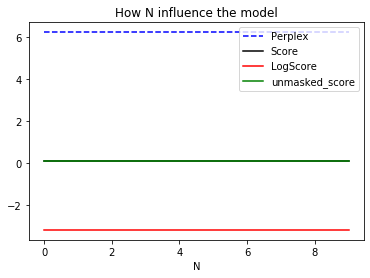

In [147]:
plt.plot(Perplex, label='Perplex',c='blue',linestyle="--")


plt.plot(Score, label='Score',c='black' )
plt.plot(LogScore, label='LogScore',c='r')
plt.plot(Unmask, label='unmasked_score',c='green')


plt.title('How N influence the model')

plt.xlabel('N')
plt.legend( )


Conclusion:for MEL model, tune N can not influence the result

# NLTK Language Modeling Module

In [115]:
text=[]
tokens = tk.sent_tokenize(song.lyrics)
for token in tokens:
    sentences=tk.word_tokenize(token)
    text.append(sentences)
    


In [116]:
text[2]

['Do', "n't", 'miss', 'your', 'chance', 'with', 'Revival', '.']

In [117]:
from nltk.util import bigrams
from nltk.util import pad_sequence
list(pad_sequence(text[0]
                  ,pad_left=True
                  ,left_pad_symbol="<s>"
                  ,pad_right=True
                  ,right_pad_symbol="</s>", n=2)
    
    
    
    )


['<s>',
 'Thank',
 'you',
 'for',
 'your',
 'interest',
 'in',
 'Revival',
 ',',
 'the',
 'number',
 'one',
 'slightly',
 'invasive',
 'treatment',
 'for',
 'Atrox',
 'Rithimis',
 '.',
 '</s>']

In [118]:
from nltk.lm.preprocessing import pad_both_ends
list(pad_both_ends(text[0], n=2))

['<s>',
 'Thank',
 'you',
 'for',
 'your',
 'interest',
 'in',
 'Revival',
 ',',
 'the',
 'number',
 'one',
 'slightly',
 'invasive',
 'treatment',
 'for',
 'Atrox',
 'Rithimis',
 '.',
 '</s>']

In [119]:
list(bigrams(pad_both_ends(text[0], n=2)))

[('<s>', 'Thank'),
 ('Thank', 'you'),
 ('you', 'for'),
 ('for', 'your'),
 ('your', 'interest'),
 ('interest', 'in'),
 ('in', 'Revival'),
 ('Revival', ','),
 (',', 'the'),
 ('the', 'number'),
 ('number', 'one'),
 ('one', 'slightly'),
 ('slightly', 'invasive'),
 ('invasive', 'treatment'),
 ('treatment', 'for'),
 ('for', 'Atrox'),
 ('Atrox', 'Rithimis'),
 ('Rithimis', '.'),
 ('.', '</s>')]

In [120]:
from nltk.util import everygrams
padded_bigrams = list(pad_both_ends(text[0], n=2))
list(everygrams(padded_bigrams, max_len=2))

[('<s>',),
 ('Thank',),
 ('you',),
 ('for',),
 ('your',),
 ('interest',),
 ('in',),
 ('Revival',),
 (',',),
 ('the',),
 ('number',),
 ('one',),
 ('slightly',),
 ('invasive',),
 ('treatment',),
 ('for',),
 ('Atrox',),
 ('Rithimis',),
 ('.',),
 ('</s>',),
 ('<s>', 'Thank'),
 ('Thank', 'you'),
 ('you', 'for'),
 ('for', 'your'),
 ('your', 'interest'),
 ('interest', 'in'),
 ('in', 'Revival'),
 ('Revival', ','),
 (',', 'the'),
 ('the', 'number'),
 ('number', 'one'),
 ('one', 'slightly'),
 ('slightly', 'invasive'),
 ('invasive', 'treatment'),
 ('treatment', 'for'),
 ('for', 'Atrox'),
 ('Atrox', 'Rithimis'),
 ('Rithimis', '.'),
 ('.', '</s>')]

In [121]:
#combine the sentences into one flat stream of words
from nltk.lm.preprocessing import flatten
list(flatten(pad_both_ends(sent, n=2) for sent in text))

['<s>',
 'Thank',
 'you',
 'for',
 'your',
 'interest',
 'in',
 'Revival',
 ',',
 'the',
 'number',
 'one',
 'slightly',
 'invasive',
 'treatment',
 'for',
 'Atrox',
 'Rithimis',
 '.',
 '</s>',
 '<s>',
 'You',
 'only',
 'get',
 'one',
 'shot',
 'to',
 'beat',
 'AR',
 '.',
 '</s>',
 '<s>',
 'Do',
 "n't",
 'miss',
 'your',
 'chance',
 'with',
 'Revival',
 '.',
 '</s>',
 '<s>',
 'Please',
 'hold',
 'to',
 'speak',
 'with',
 'a',
 'patient',
 'care',
 'representative',
 '.',
 '</s>',
 '<s>',
 'While',
 'you',
 'wait',
 ',',
 'here',
 "'s",
 'some',
 'additional',
 'information',
 ':',
 'You',
 'should',
 'discuss',
 'the',
 'potential',
 'benefits',
 'and',
 'risks',
 'of',
 'Revival',
 'with',
 'your',
 'doctor',
 'or',
 'clergyman',
 '.',
 '</s>',
 '<s>',
 'Revival',
 'is',
 'a',
 'non-injectable',
 'medication',
 'given',
 'through',
 'the',
 'ear',
 'canal',
 'and',
 'is',
 'not',
 'intended',
 'for',
 'anal',
 'use',
 '.',
 '</s>',
 '<s>',
 'Revival',
 'is',
 'a',
 'non-narcotic',
 'm

In [122]:
from nltk.lm.preprocessing import padded_everygram_pipeline
train, vocab = padded_everygram_pipeline(2, text)

In [123]:
#training

from nltk.lm import MLE
lm2 = MLE(2)

In [124]:
#fit the model

lm2.fit(train, vocab)
print(lm2.vocab)
len(lm2.vocab)

<Vocabulary with cutoff=1 unk_label='<UNK>' and 197 items>


197

In [125]:
lm2.vocab.lookup(text[0])

lm2.vocab.lookup(["aliens", "from", "Mars"])


('<UNK>', '<UNK>', '<UNK>')

In [126]:
#Using a Trained Model
print(lm2.counts)

<NgramCounter with 2 ngram orders and 632 ngrams>


In [127]:
lm2.score(word)

0.012461059190031152

In [129]:
lm2.score(word, [input_word])

1.0

In [133]:
lm2.logscore(word)

-6.326429487122303

In [142]:
lm2.entropy(Context)

7.282838662369108

In [144]:
lm2.perplexity(Context)

155.72304631037167

In [178]:
#random generate

lm2.generate(5, random_seed=3)

['Revival', 'does', 'not', 'cause', 'you']

In [181]:
#specify preceding text

lm2.generate(8, text_seed='you')

['often', 'than', 'normal', 'Feeling', 'very', 'tired', 'or', 'poor']

In [176]:
perplex=[]
score=[]
entropy=[]
logScore=[]

for i in range(10):
    
    train, vocab = padded_everygram_pipeline(2, text)
    
    
    lm = MLE(i)
    lm.fit(train, vocab)
    perplex.append(lm.perplexity(Context))
    score.append(lm.score(word))
    entropy.append(lm.entropy(Context))
    logScore.append(lm.logscore(word))

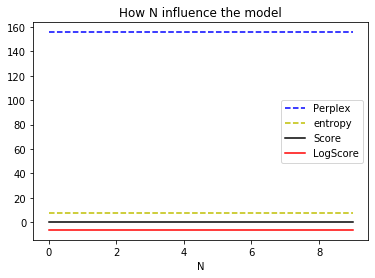

In [173]:
plt.plot(perplex, label='Perplex',c='blue',linestyle="--")
plt.plot(entropy, label='entropy',c='y',linestyle="--")


plt.plot(score, label='Score',c='black' )
plt.plot(logScore, label='LogScore',c='r')



plt.title('How N influence the model')

plt.xlabel('N')
plt.legend( )

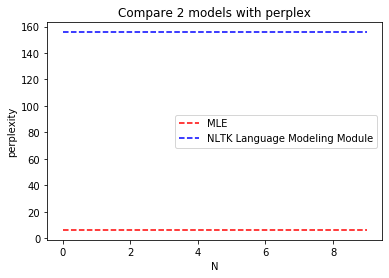

In [183]:
#comparision 2 models


plt.plot(Perplex, label='MLE',c='r',linestyle="--")
plt.plot(perplex, label='NLTK Language Modeling Module',c='blue',linestyle="--")

plt.title('Compare 2 models with perplex')

plt.xlabel('N')
plt.ylabel('perplexity')
plt.legend( )

Conclusion:MLE is the better model